<h2>Simple Regression Dataset - Linear Regression vs XGBoost</h2>

Model is trained with XGBoost installed in notebook instance

In the later examples, we will train using SageMaker's XGBoost algorithm.

Training on SageMaker takes several minutes (even for simple dataset).  

If algorithm is supported on Python, we will try them locally on notebook instance

This allows us to quickly learn an algorithm, understand tuning options and then finally train on SageMaker Cloud

In this exercise, let's compare XGBoost and Linear Regression for simple regression dataset

In [5]:
# Install xgboost in notebook instance.
#### Command to install xgboost
#!pip install xgboost==1.2

In [6]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error


# XGBoost 
import xgboost as xgb
# Linear Regression
from sklearn.linear_model import LinearRegression

In [7]:
# All data
df = pd.read_csv('linear_all.csv')

In [8]:
df.head()

,x,y
0,0,12.412275
1,1,9.691298
2,2,42.307712
3,3,20.479079
4,4,29.096098


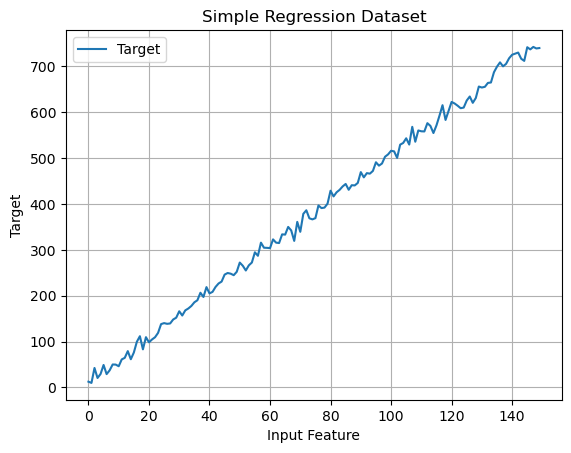

In [9]:
plt.plot(df.x,df.y,label='Target')
plt.grid(True)
plt.xlabel('Input Feature')
plt.ylabel('Target')
plt.legend()
plt.title('Simple Regression Dataset')
plt.show()

In [10]:
# Let's load Training and Validation Datasets
train_file = 'linear_train.csv'
validation_file = 'linear_validation.csv'

# Specify the column names as the file does not have column header
df_train = pd.read_csv(train_file,names=['y','x'])
df_validation = pd.read_csv(validation_file,names=['y','x'])

In [11]:
df_train.head()

,y,x
0,425.457270,82
1,687.275162,134
2,554.643782,114
3,219.007382,42
4,560.269533,109


In [12]:
df_validation.head()

,y,x
0,342.264067,67
1,60.951235,11
2,315.592889,62
3,700.097979,137
4,535.676139,108


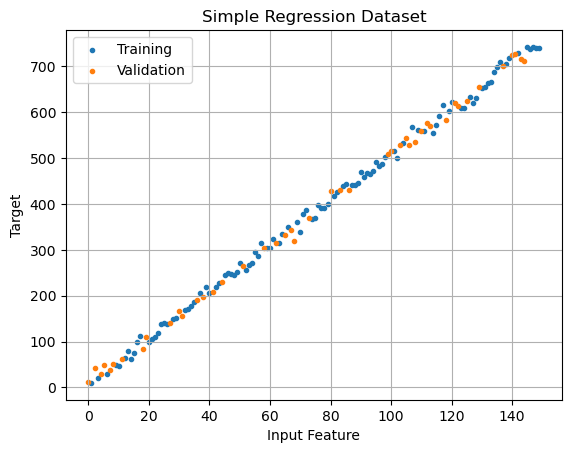

In [13]:
plt.scatter(df_train.x,df_train.y,label='Training',marker='.')
plt.scatter(df_validation.x,df_validation.y,label='Validation',marker='.')
plt.grid(True)
plt.xlabel('Input Feature')
plt.ylabel('Target')
plt.title('Simple Regression Dataset')
plt.legend()
plt.show()

In [14]:
X_train = df_train.iloc[:,1:] # Features: 1st column onwards 
y_train = df_train.iloc[:,0].ravel() # Target: 0th column

X_validation = df_validation.iloc[:,1:]
y_validation = df_validation.iloc[:,0].ravel()

In [15]:
# Create an instance of XGBoost Regressor
# XGBoost Training Parameter Reference: 
#   https://github.com/dmlc/xgboost/blob/master/doc/parameter.md
regressor = xgb.XGBRegressor()

In [16]:
# Default Options
regressor

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)

In [17]:
# Train the model
# Provide Training Dataset and Validation Dataset
# XGBoost reports training and validation error
regressor.fit(X_train,y_train, eval_set = [(X_train, y_train), (X_validation, y_validation)])

[0]	validation_0-rmse:312.59222	validation_1-rmse:309.71133
[1]	validation_0-rmse:223.90628	validation_1-rmse:221.75470
[2]	validation_0-rmse:160.90971	validation_1-rmse:156.30206
[3]	validation_0-rmse:115.67703	validation_1-rmse:111.37985
[4]	validation_0-rmse:83.50768	validation_1-rmse:80.23268
[5]	validation_0-rmse:60.28321	validation_1-rmse:56.99043
[6]	validation_0-rmse:43.79396	validation_1-rmse:40.56110
[7]	validation_0-rmse:32.11387	validation_1-rmse:29.46322
[8]	validation_0-rmse:23.79752	validation_1-rmse:21.48173
[9]	validation_0-rmse:17.93956	validation_1-rmse:16.86060
[10]	validation_0-rmse:13.83357	validation_1-rmse:14.40190
[11]	validation_0-rmse:10.89259	validation_1-rmse:13.18560
[12]	validation_0-rmse:8.73792	validation_1-rmse:12.70564
[13]	validation_0-rmse:7.32472	validation_1-rmse:12.86105
[14]	validation_0-rmse:6.22650	validation_1-rmse:12.87767
[15]	validation_0-rmse:5.58807	validation_1-rmse:13.13437
[16]	validation_0-rmse:5.02747	validation_1-rmse:13.03502
[17]

c:\Users\sarsadanand\Anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [18]:
# Get the Training RMSE and Evaluation RMSE
eval_result = regressor.evals_result()

In [19]:
eval_result

{'validation_0': {'rmse': [312.592224,
   223.906281,
   160.909714,
   115.677025,
   83.507683,
   60.283211,
   43.793957,
   32.113873,
   23.797516,
   17.939562,
   13.833571,
   10.892591,
   8.737918,
   7.324715,
   6.226498,
   5.588068,
   5.027469,
   4.582295,
   4.258395,
   4.020878,
   3.833373,
   3.571677,
   3.369205,
   3.227522,
   3.091522,
   2.971028,
   2.825808,
   2.750748,
   2.66672,
   2.643051,
   2.611803,
   2.553968,
   2.439063,
   2.31654,
   2.291446,
   2.194853,
   2.140137,
   2.071828,
   1.959563,
   1.885308,
   1.867349,
   1.820478,
   1.788032,
   1.693326,
   1.622491,
   1.596306,
   1.583241,
   1.529503,
   1.468257,
   1.404239,
   1.388616,
   1.345412,
   1.298715,
   1.261568,
   1.249043,
   1.194046,
   1.159002,
   1.14578,
   1.108737,
   1.099851,
   1.061069,
   1.045704,
   1.018807,
   0.98739,
   0.951604,
   0.917303,
   0.891618,
   0.882622,
   0.856064,
   0.830393,
   0.80217,
   0.794831,
   0.769352,
   0.747886,
   

In [20]:
training_rounds = range(len(eval_result['validation_0']['rmse']))

In [21]:
print(training_rounds)

range(0, 100)


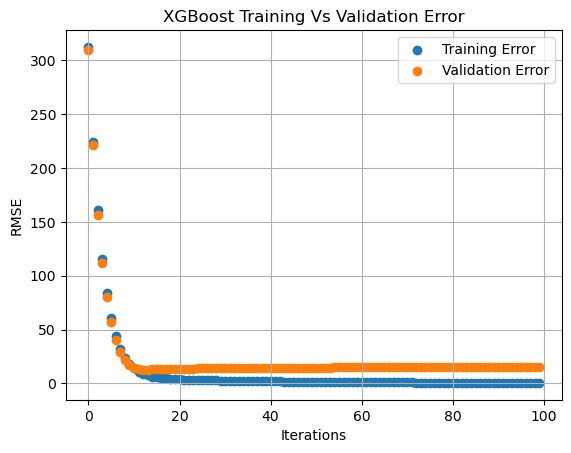

In [22]:
plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('XGBoost Training Vs Validation Error')
plt.legend()
plt.show()

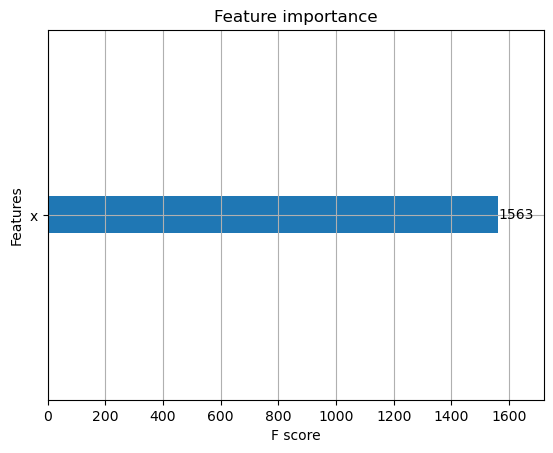

In [23]:
xgb.plot_importance(regressor)
plt.show()

## Validation Dataset Compare Actual and Predicted

In [24]:
result = regressor.predict(X_validation)

In [25]:
result[:5]

array([350.00354,  64.40639, 314.84644, 705.8229 , 560.227  ],
      dtype=float32)

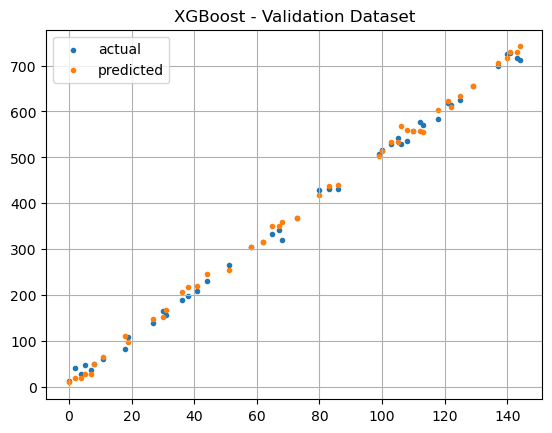

In [26]:
plt.title('XGBoost - Validation Dataset')
plt.scatter(df_validation.x,df_validation.y,label='actual',marker='.')
plt.scatter(df_validation.x,result,label='predicted',marker='.')
plt.grid(True)
plt.legend()
plt.show()

In [27]:
# RMSE Metrics
print('XGBoost Algorithm Metrics')
mse = mean_squared_error(df_validation.y,result)
print(" Mean Squared Error: {0:.2f}".format(mse))
print(" Root Mean Square Error: {0:.2f}".format(mse**.5))

XGBoost Algorithm Metrics
 Mean Squared Error: 226.91
 Root Mean Square Error: 15.06


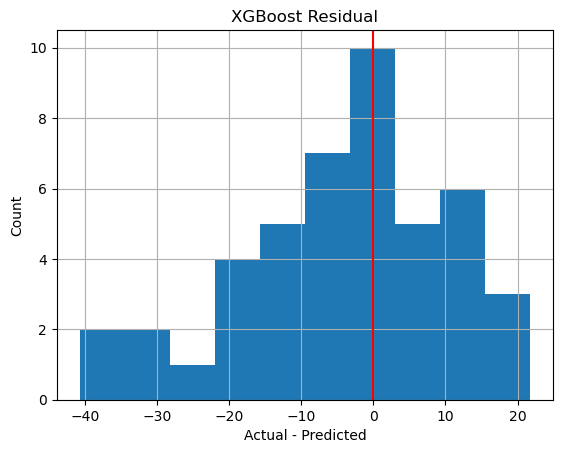

In [28]:
# Residual
# Over prediction and Under Prediction needs to be balanced
# Training Data Residuals
residuals = df_validation.y - result
plt.hist(residuals)
plt.grid(True)
plt.xlabel('Actual - Predicted')
plt.ylabel('Count')
plt.title('XGBoost Residual')
plt.axvline(color='r')
plt.show()

In [29]:
# Count number of values greater than zero and less than zero
value_counts = (residuals > 0).value_counts(sort=False)

print(' Under Estimation: {0}'.format(value_counts[True]))
print(' Over  Estimation: {0}'.format(value_counts[False]))

 Under Estimation: 22
 Over  Estimation: 23


c:\Users\sarsadanand\Anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


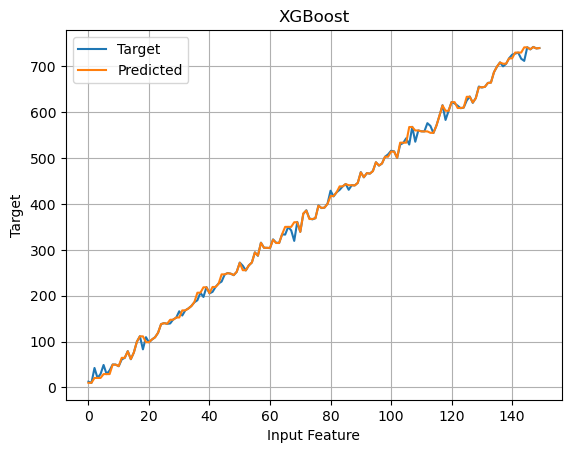

In [30]:
# Plot for entire dataset
plt.plot(df.x,df.y,label='Target')
plt.plot(df.x,regressor.predict(df[['x']]) ,label='Predicted')
plt.grid(True)
plt.xlabel('Input Feature')
plt.ylabel('Target')
plt.legend()
plt.title('XGBoost')
plt.show()

## Linear Regression Algorithm 

In [31]:
lin_regressor = LinearRegression()

In [32]:
lin_regressor.fit(X_train,y_train)

LinearRegression()

Compare Weights assigned by Linear Regression.

Original Function: 5*x + 8 + some noise


In [33]:
lin_regressor.coef_

array([4.99777227])

In [34]:
lin_regressor.intercept_

8.683965388503225

In [35]:
result = lin_regressor.predict(df_validation[['x']])

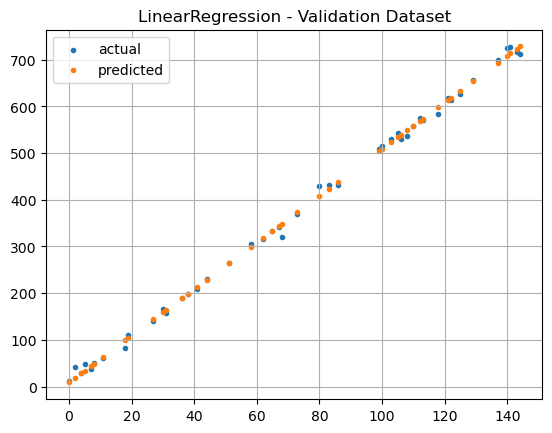

In [36]:
plt.title('LinearRegression - Validation Dataset')
plt.scatter(df_validation.x,df_validation.y,label='actual',marker='.')
plt.scatter(df_validation.x,result,label='predicted',marker='.')
plt.grid(True)
plt.legend()
plt.show()

In [37]:
# RMSE Metrics
print('Linear Regression Metrics')
mse = mean_squared_error(df_validation.y,result)
print(" Mean Squared Error: {0:.2f}".format(mse))
print(" Root Mean Square Error: {0:.2f}".format(mse**.5))

Linear Regression Metrics
 Mean Squared Error: 99.10
 Root Mean Square Error: 9.95


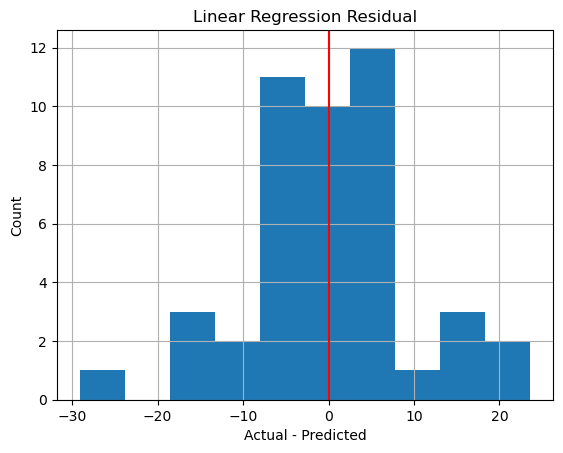

In [38]:
# Residual
# Over prediction and Under Prediction needs to be balanced
# Training Data Residuals
residuals = df_validation.y - result
plt.hist(residuals)
plt.grid(True)
plt.xlabel('Actual - Predicted')
plt.ylabel('Count')
plt.title('Linear Regression Residual')
plt.axvline(color='r')
plt.show()

In [39]:
# Count number of values greater than zero and less than zero
value_counts = (residuals > 0).value_counts(sort=False)

print(' Under Estimation: {0}'.format(value_counts[True]))
print(' Over  Estimation: {0}'.format(value_counts[False]))

 Under Estimation: 24
 Over  Estimation: 21


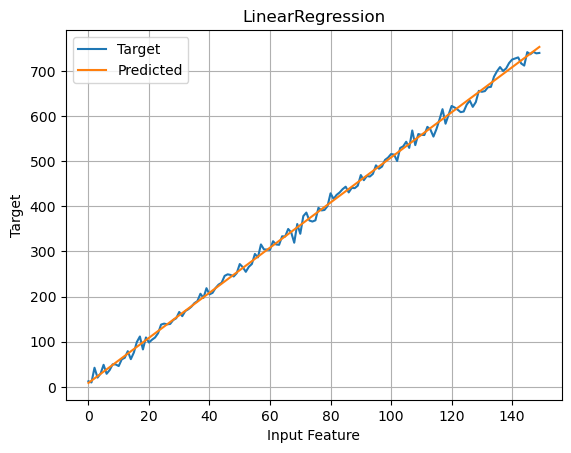

In [40]:
# Plot for entire dataset
plt.plot(df.x,df.y,label='Target')
plt.plot(df.x,lin_regressor.predict(df[['x']]) ,label='Predicted')
plt.grid(True)
plt.xlabel('Input Feature')
plt.ylabel('Target')
plt.legend()
plt.title('LinearRegression')
plt.show()

<h2>Input Features - Outside range used for training</h2>

XGBoost Prediction has an upper and lower bound (applies to tree based algorithms)

Linear Regression extrapolates

In [41]:
# True Function
def straight_line(x):
    return 5*x + 8

In [42]:
# X is outside range of training samples
X = np.array([-100,-5,160,1000,5000])
y = straight_line(X)

df_tmp = pd.DataFrame({'x':X,'y':y})
df_tmp['xgboost']=regressor.predict(df_tmp[['x']])
df_tmp['linear']=lin_regressor.predict(df_tmp[['x']])

c:\Users\sarsadanand\Anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [43]:
df_tmp

,x,y,xgboost,linear
0,-100,-492,9.905086,-491.093262
1,-5,-17,9.905086,-16.304896
2,160,808,739.950562,808.327528
3,1000,5008,739.950562,5006.456235
4,5000,25008,739.950562,24997.545312


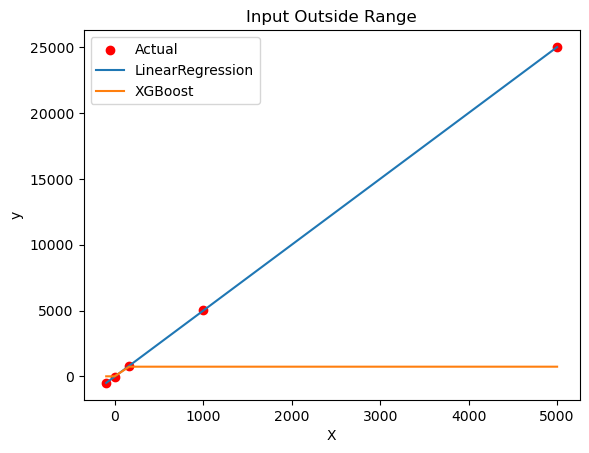

In [44]:
# XGBoost Predictions have an upper bound and lower bound
# Linear Regression Extrapolates
plt.scatter(df_tmp.x,df_tmp.y,label='Actual',color='r')
plt.plot(df_tmp.x,df_tmp.linear,label='LinearRegression')
plt.plot(df_tmp.x,df_tmp.xgboost,label='XGBoost')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Input Outside Range')
plt.show()

In [45]:
# X is inside range of training samples
X = np.array([0,1,3,5,7,9,11,15,18,125])
y = straight_line(X)

df_tmp = pd.DataFrame({'x':X,'y':y})
df_tmp['xgboost']=regressor.predict(df_tmp[['x']])
df_tmp['linear']=lin_regressor.predict(df_tmp[['x']])

c:\Users\sarsadanand\Anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [46]:
df_tmp

,x,y,xgboost,linear
0,0,8,9.905086,8.683965
1,1,13,9.905086,13.681738
2,3,23,20.523394,23.677282
3,5,33,28.935297,33.672827
4,7,43,28.935297,43.668371
5,9,53,49.514168,53.663916
6,11,63,64.406387,63.659460
7,15,83,75.930733,83.650549
8,18,98,111.305298,98.643866
9,125,633,633.698364,633.405499


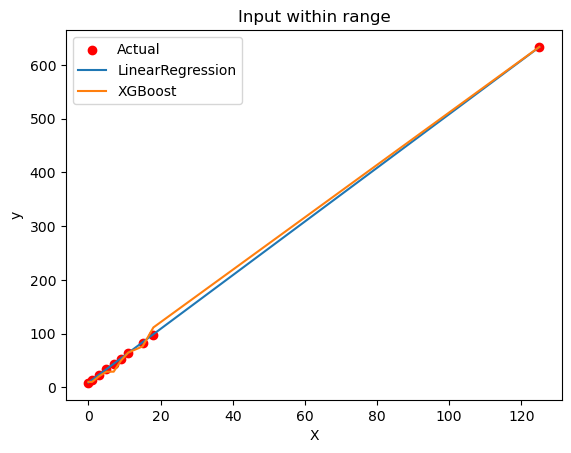

In [47]:
# XGBoost Predictions have an upper bound and lower bound
# Linear Regression Extrapolates
plt.scatter(df_tmp.x,df_tmp.y,label='Actual',color='r')
plt.plot(df_tmp.x,df_tmp.linear,label='LinearRegression')
plt.plot(df_tmp.x,df_tmp.xgboost,label='XGBoost')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Input within range')
plt.show()

<h2>Summary</h2>

1. Use sagemaker notebook as your own server on the cloud
2. Install python packages
3. Train directly on SageMaker Notebook (for small datasets, it takes few seconds).
4. Once happy with algorithm and performance, you can train on sagemaker cloud (takes several minutes even for small datasets)
5. Not all algorithms are available for installation (for example: AWS algorithms like DeepAR are available only in SageMaker)
6. In this exercise, we installed XGBoost and compared performance of XGBoost model and Linear Regression